## Simple Harmonic Motion

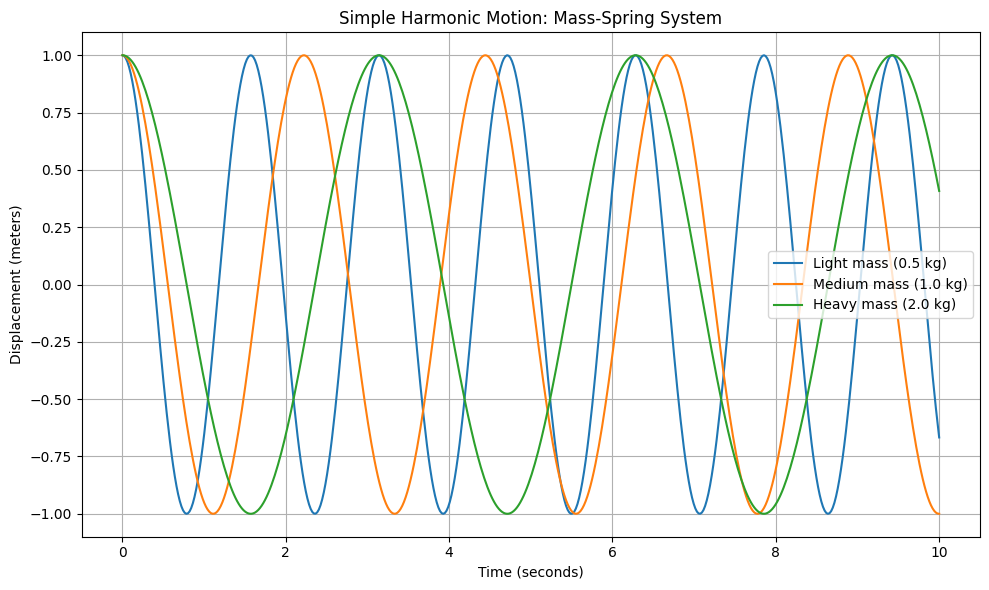

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters
spring_constant = 8.0  # N/m
time_points = np.linspace(0, 10, 500)  # 10 seconds simulation

# Different masses for comparison
mass_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))
for mass in mass_values:
    # Determine mass category
    if mass < 0.8:
        mass_label = "Light"
    elif mass < 1.5:
        mass_label = "Medium"
    else:
        mass_label = "Heavy"
    
    # Calculate angular frequency and displacement
    omega = np.sqrt(spring_constant / mass)
    displacement = np.cos(omega * time_points)
    
    plt.plot(time_points, displacement, label=f"{mass_label} mass ({mass} kg)")

plt.title("Simple Harmonic Motion: Mass-Spring System")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("harmonic_motion.png", dpi=150)
plt.show()

## Projectile Motion

Projectile still in air at simulation end


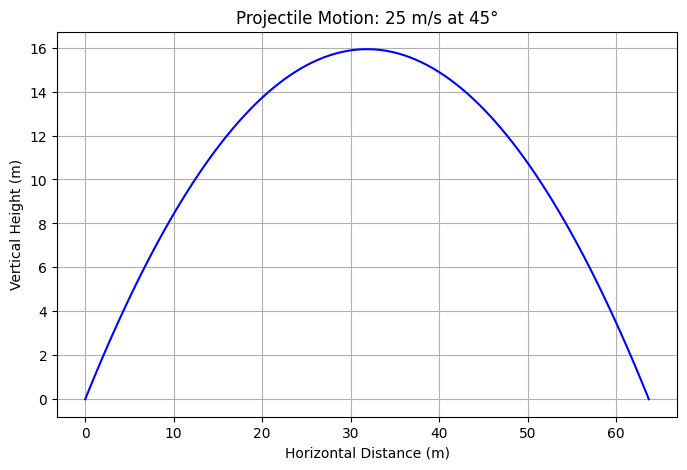

In [3]:
def simulate_projectile(initial_velocity, launch_angle):
    g = 9.81  # Gravitational acceleration (m/s²)
    angle_rad = np.radians(launch_angle)  # Convert angle to radians
    
    # Calculate time of flight
    flight_time = 2 * initial_velocity * np.sin(angle_rad) / g
    time_steps = np.linspace(0, flight_time, 100)
    
    # Initialize position arrays
    x_positions = []
    y_positions = []
    
    # Calculate trajectory
    for t in time_steps:
        x = initial_velocity * np.cos(angle_rad) * t
        y = initial_velocity * np.sin(angle_rad) * t - 0.5 * g * t**2
        
        # Check if object has hit the ground
        if y < 0:
            y = 0  # Set to ground level
            x_positions.append(x)
            y_positions.append(y)
            break
        
        x_positions.append(x)
        y_positions.append(y)
    
    # Plot trajectory
    plt.figure(figsize=(8, 5))
    plt.plot(x_positions, y_positions, 'b-')
    plt.title(f"Projectile Motion: {initial_velocity} m/s at {launch_angle}°")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Vertical Height (m)")
    plt.grid(True)
    
    # Ground impact detection
    if y_positions[-1] == 0:
        print(f"Projectile landed at {x_positions[-1]:.1f} meters")
    else:
        print("Projectile still in air at simulation end")
    
    return x_positions, y_positions

# Simulate projectile at 45° with 25 m/s initial velocity
x, y = simulate_projectile(25, 45)

## Planetary Motion (Basic Simulation)

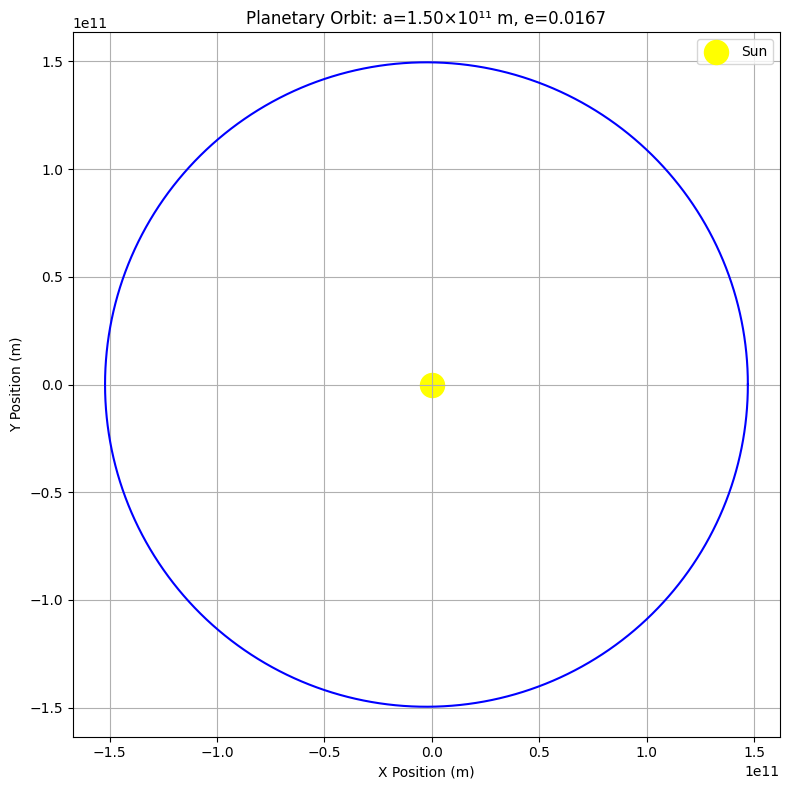

Completed 365.2 day orbit in 1001 steps


In [7]:
def simulate_planet_orbit(semi_major_axis, eccentricity=0.1):
    G = 6.67430e-11  # Gravitational constant (m³ kg⁻¹ s⁻²)
    solar_mass = 1.989e30  # Mass of the Sun (kg)
    
    # Calculate orbital period using Kepler's third law
    period = 2 * np.pi * np.sqrt(semi_major_axis**3 / (G * solar_mass))
    
    # Initialize orbital parameters
    time_elapsed = 0
    time_step = period / 1000  # Small time steps for accuracy
    current_angle = 0
    
    # Position storage
    x_positions = []
    y_positions = []
    
    # Simulate until one full orbit is completed
    while current_angle < 2 * np.pi:
        # Calculate distance from Sun
        distance = semi_major_axis * (1 - eccentricity**2) / (1 + eccentricity * np.cos(current_angle))
        
        # Calculate coordinates
        x = distance * np.cos(current_angle)
        y = distance * np.sin(current_angle)
        
        x_positions.append(x)
        y_positions.append(y)
        
        # Update angle and time
        angular_velocity = 2 * np.pi / period
        current_angle += angular_velocity * time_step
        time_elapsed += time_step
    
    # Plot orbit
    plt.figure(figsize=(8, 8))
    plt.plot(x_positions, y_positions, 'b-')
    plt.scatter([0], [0], color='yellow', s=300, label='Sun')
    plt.title(f"Planetary Orbit: a={semi_major_axis/1e11:.2f}×10¹¹ m, e={eccentricity}")
    plt.xlabel("X Position (m)")
    plt.ylabel("Y Position (m)")
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("planetary_orbit.png", dpi=150)
    plt.show()
    
    print(f"Completed {period/(60*60*24):.1f} day orbit in {len(x_positions)} steps")
    return x_positions, y_positions

# Simulate Earth-like orbit (semi-major axis = 1.496e11 m, eccentricity = 0.0167)
x_orbit, y_orbit = simulate_planet_orbit(1.496e11, 0.0167)

## Matrix Multiplication

In [8]:
# Create matrices
matrix_A = np.array([[2, 4, 1], [5, 3, 8], [7, 6, 9]])
matrix_B = np.array([[9, 3, 7], [2, 5, 4], [8, 1, 6]])

print("Matrix A:")
print(matrix_A)

print("\nMatrix B:")
print(matrix_B)

# Multiply using @ operator
result_operator = matrix_A @ matrix_B
print("\nResult using @ operator:")
print(result_operator)

# Multiply using numpy.dot()
result_dot = np.dot(matrix_A, matrix_B)
print("\nResult using np.dot():")
print(result_dot)

# Verify both methods produce same result
if np.array_equal(result_operator, result_dot):
    print("\nBoth methods produce identical results")
else:
    print("\nResults differ between methods")

Matrix A:
[[2 4 1]
 [5 3 8]
 [7 6 9]]

Matrix B:
[[9 3 7]
 [2 5 4]
 [8 1 6]]

Result using @ operator:
[[ 34  27  36]
 [115  38  95]
 [147  60 127]]

Result using np.dot():
[[ 34  27  36]
 [115  38  95]
 [147  60 127]]

Both methods produce identical results
